# Dados e Aprendizagem Automática
## Produção Energética e Sustentabilidade


**Dataset:** .csv

**Problema:** Prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas, a cada hora do dia.
___
**Features dos Datasets de Energia:**

* Data - o timestamp associado ao registo, ao dia;
* Hora - a hora associada ao registo;
* Normal (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
* Horário Económico (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
* Autoconsumo (kWh) - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
* Injeção na rede (kWh) - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

**Features dos Datasets Meteorológicos:**

* dt - o timestamp associado ao registo;
* dt_iso - a data associada ao registo, ao segundo;
* city_name - o local em causa;
* temp - temperatura em ºC;
* feels_like - sensação térmica em ºC;
* temp_min - temperatura mínima sentida em ºC;
* temp_max - temperatura máxima sentida em ºC;
* pressure - pressão atmosférica sentida em atm;
* sea_level - pressão atmosférica sentida ao nível do mar em atm;
* grnd_level - pressão atmosférica sentida à altitude local em atm;
* humidity - humidade em percentagem;
* wind_speed - velocidade do vento em metros por segundo;
* rain_1h - valor médio de precipitação;
* clouds_all - nível de nebulosidade em percentagem;
* weather_description - avaliação qualitativa do estado do tempo.

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
%matplotlib inline

##### Concat dos dois datasets para treino da energia

In [2]:
df2021 = pd.read_csv('./datasets/competicao/energia_202109-202112.csv')
df2022 = pd.read_csv('./datasets/competicao/energia_202201-202212.csv')

df_energia_train = pd.concat([df2021, df2022], ignore_index=True)
df_energia_teste = pd.read_csv('./datasets/competicao/energia_202301-202304.csv')

##### Adicionar uma coluna com o timestamp em segundos

In [3]:
df_energia_train['dt'] = pd.to_datetime(df_energia_train['Data'] + ' ' + df_energia_train['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')
df_energia_teste['dt'] = pd.to_datetime(df_energia_teste['Data'] + ' ' + df_energia_teste['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

def create_timestamp(row):
    timestamp_str = str(row['dt'])
    timestamp= datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    timestamp_utc = timestamp.replace(tzinfo=timezone.utc)
    return int(timestamp_utc.timestamp())

df_energia_train['dt'] = df_energia_train.apply(create_timestamp, axis=1)
df_energia_teste['dt'] = df_energia_teste.apply(create_timestamp, axis=1)

##### Concat dos dois datasets para treino da meteorologia

In [4]:
dfm2021 = pd.read_csv('./datasets/competicao/meteo_202109-202112.csv')
dfm2022 = pd.read_csv('./datasets/competicao/meteo_202201-202212.csv')

df_meteo_train = pd.concat([dfm2021, dfm2022], ignore_index=True)
df_meteo_teste = pd.read_csv('./datasets/competicao/meteo_202301-202304.csv')

##### Join do dataset de energia com o de meteorologia

In [5]:
df_train = pd.merge(df_energia_train, df_meteo_train, left_on='dt', right_on='dt', how='inner')

df_teste = pd.merge(df_energia_teste, df_meteo_teste, left_on='dt', right_on='dt', how='left')

In [6]:
df_meteo_emfalta = pd.read_csv('./datasets/competicao/Braga_tocomplete.csv')
df_meteo_emfalta

,datetime,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,conditions
0,2023-03-14T00:00:00,11.6,11.6,88.32,0.125,8.7,1022.1,36.4,"Rain, Partially cloudy"
1,2023-03-14T01:00:00,11.7,11.7,83.32,0.000,8.2,1022.1,27.6,Partially cloudy
2,2023-03-14T02:00:00,9.9,9.6,88.24,0.000,5.2,1023.0,27.6,Partially cloudy
3,2023-03-14T03:00:00,10.0,10.0,92.90,0.000,0.4,1022.0,36.4,Partially cloudy
4,2023-03-14T04:00:00,9.1,9.1,98.79,0.000,0.7,1022.0,27.6,Partially cloudy
...,...,...,...,...,...,...,...,...,...
546,2023-04-05T19:00:00,17.0,17.0,50.39,0.000,15.2,1016.1,30.0,Partially cloudy
547,2023-04-05T20:00:00,14.2,14.2,58.83,0.000,10.9,1016.2,87.2,Partially cloudy
548,2023-04-05T21:00:00,14.1,14.1,59.59,0.000,15.5,1017.1,86.6,Partially cloudy
549,2023-04-05T22:00:00,13.0,13.0,69.75,0.000,9.1,1017.2,30.0,Partially cloudy


In [7]:
df_meteo_emfalta['dt'] = pd.to_datetime(df_meteo_emfalta['datetime'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
df_meteo_emfalta['dt'] = df_meteo_emfalta.apply(create_timestamp, axis=1)

In [9]:
df_meteo_emfalta.head()

,datetime,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,conditions,dt
0,2023-03-14T00:00:00,11.6,11.6,88.32,0.125,8.7,1022.1,36.4,"Rain, Partially cloudy",1678752000
1,2023-03-14T01:00:00,11.7,11.7,83.32,0.000,8.2,1022.1,27.6,Partially cloudy,1678755600
2,2023-03-14T02:00:00,9.9,9.6,88.24,0.000,5.2,1023.0,27.6,Partially cloudy,1678759200
3,2023-03-14T03:00:00,10.0,10.0,92.90,0.000,0.4,1022.0,36.4,Partially cloudy,1678762800
4,2023-03-14T04:00:00,9.1,9.1,98.79,0.000,0.7,1022.0,27.6,Partially cloudy,1678766400


In [10]:
df_meteo_emfalta.isna().sum()

datetime            0
temp                0
feelslike           0
humidity            0
precip              0
windspeed           0
sealevelpressure    0
cloudcover          0
conditions          0
dt                  0
dtype: int64

In [11]:
df_teste_v1 = pd.merge(df_teste, df_meteo_emfalta, left_on='dt', right_on='dt', how='left')

In [12]:
df_teste_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,dt_iso,city_name,temp_x,feels_like,...,weather_description,datetime,temp_y,feelslike,humidity_y,precip,windspeed,sealevelpressure,cloudcover,conditions
0,2023-01-01,0,0.0,0.467,0.0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,...,moderate rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,1,0.0,0.577,0.0,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,...,moderate rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01,2,0.0,0.346,0.0,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,...,moderate rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,3,0.0,0.270,0.0,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,...,moderate rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01,4,0.0,0.252,0.0,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,...,moderate rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_teste_v1['windspeed'] = df_teste_v1['windspeed'] * 1000 / 3600

In [14]:
df_teste_v1['temp_x'] = df_teste_v1['temp_x'].fillna(df_teste_v1['temp_y'])
df_teste_v1['feels_like'] = df_teste_v1['feels_like'].fillna(df_teste_v1['feelslike'])
df_teste_v1['humidity_x'] = df_teste_v1['humidity_x'].fillna(df_teste_v1['humidity_y'])
df_teste_v1['wind_speed'] = df_teste_v1['wind_speed'].fillna(df_teste_v1['windspeed'])
df_teste_v1['clouds_all'] = df_teste_v1['clouds_all'].fillna(df_teste_v1['cloudcover'])
df_teste_v1['rain_1h'] = df_teste_v1['rain_1h'].fillna(df_teste_v1['precip'])
df_teste_v1['pressure'] = df_teste_v1['pressure'].fillna(df_teste_v1['sealevelpressure'])

In [15]:
df_teste_v1.drop(['datetime'], axis=1, inplace=True)
df_teste_v1.drop(['temp_y'], axis=1, inplace=True)
df_teste_v1.drop(['feelslike'], axis=1, inplace=True)
df_teste_v1.drop(['humidity_y'], axis=1, inplace=True)
df_teste_v1.drop(['precip'], axis=1, inplace=True)
df_teste_v1.drop(['windspeed'], axis=1, inplace=True)
df_teste_v1.drop(['sealevelpressure'], axis=1, inplace=True)
df_teste_v1.drop(['cloudcover'], axis=1, inplace=True)

In [16]:
df_teste_v1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,dt_iso,city_name,temp_x,feels_like,...,temp_max,pressure,sea_level,grnd_level,humidity_x,wind_speed,rain_1h,clouds_all,weather_description,conditions
0,2023-01-01,0,0.0,0.467,0.0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,...,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,NaN
1,2023-01-01,1,0.0,0.577,0.0,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,...,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,NaN
2,2023-01-01,2,0.0,0.346,0.0,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,...,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,NaN
3,2023-01-01,3,0.0,0.270,0.0,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,...,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,NaN
4,2023-01-01,4,0.0,0.252,0.0,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,...,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,NaN


### Ver e compreender dados

In [17]:
df_train.shape

(11016, 21)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
 7   dt_iso                   11016 non-null  object 
 8   city_name                11016 non-null  object 
 9   temp                     11016 non-null  float64
 10  feels_like               11016 non-null  float64
 11  temp_min                 11016 non-null  float64
 12  temp_max                 11016 non-null  float64
 13  pressure                 11016 non-null  int64  
 14  sea_level             

In [19]:
df_train.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,NaN,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,NaN,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,NaN,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,NaN,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,NaN,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds


In [20]:
df_train.describe()

,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,0.0,0.0,11016.000000,11016.000000,2284.000000,11016.000000
mean,11.500000,0.202278,0.159714,0.117314,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,NaN,NaN,76.570715,2.672039,0.896642,54.000908
std,6.922501,0.349478,0.271792,0.176762,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,NaN,NaN,16.268260,1.476158,1.079381,40.553002
min,0.000000,0.000000,0.000000,0.000000,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,NaN,NaN,66.000000,1.620000,0.210000,7.000000
50%,11.500000,0.000000,0.000000,0.000000,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,NaN,NaN,81.000000,2.400000,0.460000,60.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,NaN,NaN,91.000000,3.420000,1.092500,98.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


In [21]:
print(df_train.isna().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64


In [22]:
print(df_train.duplicated().sum())

0


### Qualidade dos dados

Verificar missing values em ambos os dataframes

<Axes: >

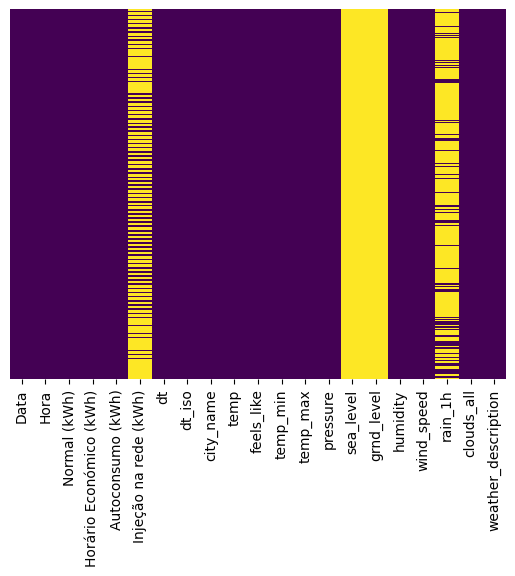

In [23]:
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

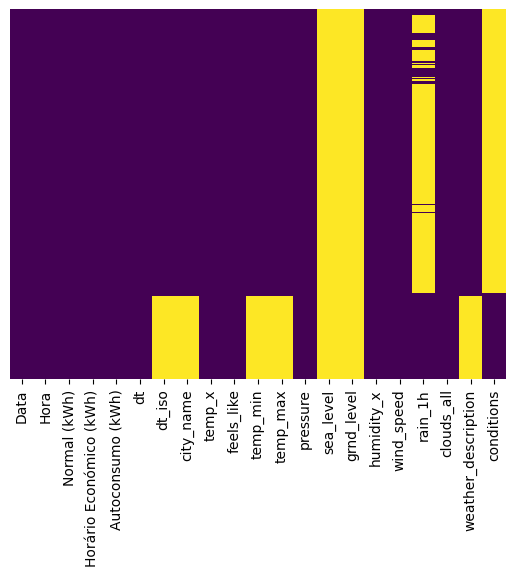

In [24]:
sns.heatmap(df_teste_v1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Outliers

Text(0.5, 1.0, 'Nuvens')

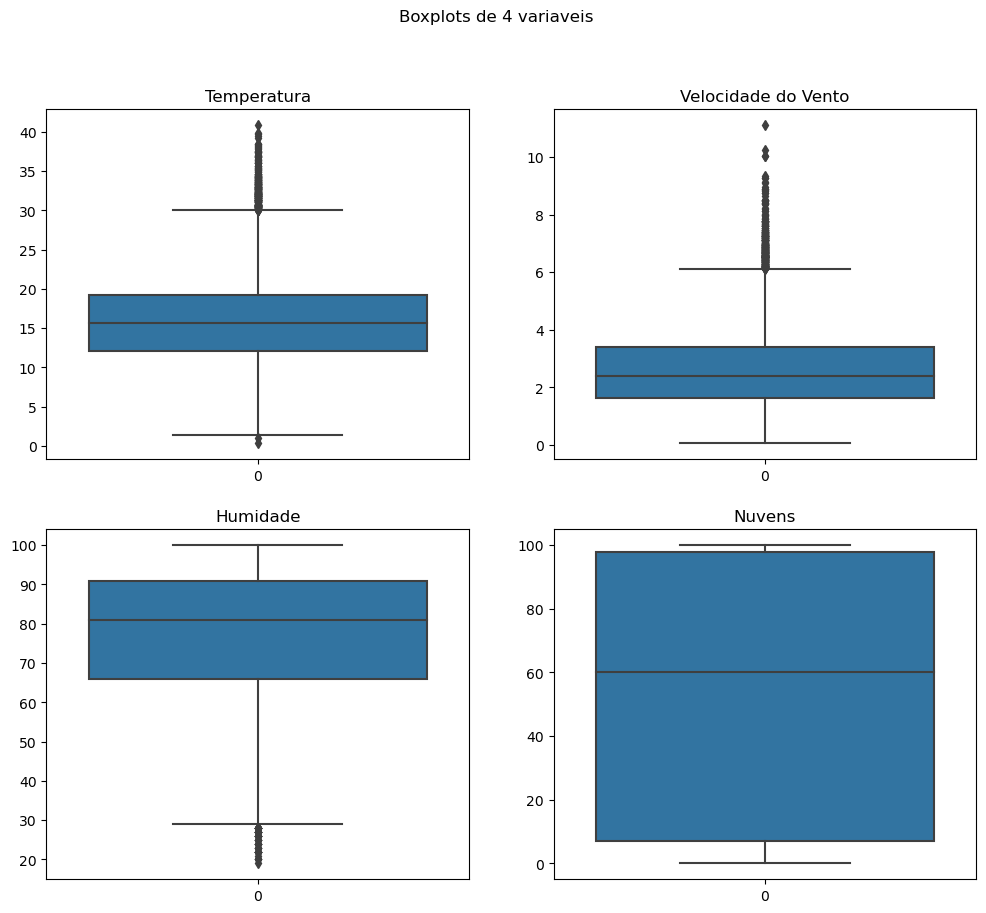

In [25]:
fig,axs=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Boxplots de 4 variaveis')
sns.boxplot(data=df_train['temp'],ax=axs[0,0])
axs[0, 0].set_title('Temperatura')
sns.boxplot(data=df_train['wind_speed'],ax=axs[0,1])
axs[0, 1].set_title('Velocidade do Vento')
sns.boxplot(data=df_train['humidity'],ax=axs[1,0])
axs[1, 0].set_title('Humidade')
sns.boxplot(data=df_train['clouds_all'],ax=axs[1,1])
axs[1, 1].set_title('Nuvens')

### Exploração dos dados

In [26]:
df_train.describe()

,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,0.0,0.0,11016.000000,11016.000000,2284.000000,11016.000000
mean,11.500000,0.202278,0.159714,0.117314,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,NaN,NaN,76.570715,2.672039,0.896642,54.000908
std,6.922501,0.349478,0.271792,0.176762,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,NaN,NaN,16.268260,1.476158,1.079381,40.553002
min,0.000000,0.000000,0.000000,0.000000,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,NaN,NaN,66.000000,1.620000,0.210000,7.000000
50%,11.500000,0.000000,0.000000,0.000000,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,NaN,NaN,81.000000,2.400000,0.460000,60.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,NaN,NaN,91.000000,3.420000,1.092500,98.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


## Preparação e transformação de dados

### Lidar com datas

In [27]:
df_train['Data'].head()

0    2021-09-29
1    2021-09-29
2    2021-09-29
3    2021-09-29
4    2021-09-29
Name: Data, dtype: object

In [28]:
df_train['Data'] = pd.to_datetime(df_train['Data'], format='%Y-%m-%d', errors='coerce')

In [29]:
df_teste_v1['Data'] = pd.to_datetime(df_teste_v1['Data'], format='%Y-%m-%d', errors='coerce')

In [30]:
df_train['date_year'] = df_train['Data'].dt.year
df_train['date_month'] = df_train['Data'].dt.month
df_train['date_day'] = df_train['Data'].dt.day
df_train['date_hour'] = df_train['Hora']

In [31]:
df_teste_v1['date_year'] = df_teste_v1['Data'].dt.year
df_teste_v1['date_month'] = df_teste_v1['Data'].dt.month
df_teste_v1['date_day'] = df_teste_v1['Data'].dt.day
df_teste_v1['date_hour'] = df_teste_v1['Hora']

In [32]:
df_train.drop('Data', axis=1, inplace=True)
df_train.drop('Hora', axis=1, inplace=True)

In [33]:
df_teste_v1.drop('Data', axis=1, inplace=True)
df_teste_v1.drop('Hora', axis=1, inplace=True)

### Drop or fill

In [34]:
df_train.drop(['sea_level'], axis=1, inplace=True)
df_train.drop(['grnd_level'], axis=1, inplace=True)
df_train.drop(['dt'], axis=1, inplace=True)
df_train.drop(['dt_iso'], axis=1, inplace=True)
df_train.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,0.0,0.0,0.0,NaN,local,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,2021,9,29,0
1,0.0,0.0,0.0,NaN,local,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,2021,9,29,1
2,0.0,0.0,0.0,NaN,local,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,2021,9,29,2
3,0.0,0.0,0.0,NaN,local,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,2021,9,29,3
4,0.0,0.0,0.0,NaN,local,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,2021,9,29,4


In [35]:
df_teste_v1.drop(['sea_level'], axis=1, inplace=True)
df_teste_v1.drop(['grnd_level'], axis=1, inplace=True)
df_teste_v1.drop(['dt'], axis=1, inplace=True)
df_teste_v1.drop(['dt_iso'], axis=1, inplace=True)
df_teste_v1.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),city_name,temp_x,feels_like,temp_min,temp_max,pressure,humidity_x,wind_speed,rain_1h,clouds_all,weather_description,conditions,date_year,date_month,date_day,date_hour
0,0.0,0.467,0.0,local,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,moderate rain,NaN,2023,1,1,0
1,0.0,0.577,0.0,local,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,moderate rain,NaN,2023,1,1,1
2,0.0,0.346,0.0,local,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,moderate rain,NaN,2023,1,1,2
3,0.0,0.270,0.0,local,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,moderate rain,NaN,2023,1,1,3
4,0.0,0.252,0.0,local,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,moderate rain,NaN,2023,1,1,4


### Tratamento de dados categóricos

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   city_name                11016 non-null  object 
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  2284 non-null   float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [37]:
df_train.drop('city_name',axis=1,inplace=True)

In [38]:
df_teste_v1.drop('city_name',axis=1,inplace=True)

weather_description

In [39]:
df_train['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

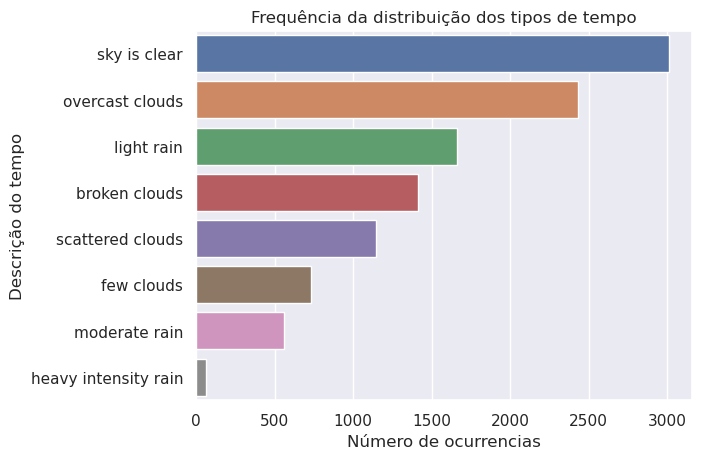

In [40]:
weather_count = df_train['weather_description'].value_counts()
sns.set(style='darkgrid')
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Frequência da distribuição dos tipos de tempo')
plt.xlabel('Número de ocurrencias', fontsize=12)
plt.ylabel('Descrição do tempo', fontsize=12)
plt.show()

In [41]:
df_train['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [42]:
df_teste_v1['conditions'].value_counts()

conditions
Partially cloudy          315
Clear                      93
Overcast                   89
Rain, Partially cloudy     15
Rain, Overcast             14
Rain                        1
Name: count, dtype: int64

In [43]:
#sns.set_style('darkgrid')
#g = sns.FacetGrid(df_train,hue='weather_description',height=6,aspect=2)
#g = g.map(plt.hist,'clouds_all',bins=20,alpha=0.7)
#g.add_legend()

In [44]:
#sns.set_style('darkgrid')
#g = sns.FacetGrid(df_teste_v1,hue='conditions',height=6,aspect=2)
#g = g.map(plt.hist,'clouds_all',bins=6,alpha=0.7)
#g.add_legend()

In [45]:
replace_map = {'weather_description': {'sky is clear': 1,'few clouds': 2, 'scattered clouds': 3,'broken clouds': 4,'overcast clouds': 5,
 'light rain': 6,
 'moderate rain': 7,
 'heavy intensity rain': 8}}

In [46]:
labels = df_train['weather_description'].astype('category').cat.categories.tolist()
print(replace_map)

{'weather_description': {'sky is clear': 1, 'few clouds': 2, 'scattered clouds': 3, 'broken clouds': 4, 'overcast clouds': 5, 'light rain': 6, 'moderate rain': 7, 'heavy intensity rain': 8}}


In [47]:
df_train.replace(replace_map, inplace=True)

In [48]:
df_teste_v1.replace(replace_map, inplace=True)

In [49]:
df_teste_v1['conditions'].unique()

array([nan, 'Rain, Partially cloudy', 'Partially cloudy', 'Clear',
       'Overcast', 'Rain, Overcast', 'Rain'], dtype=object)

In [50]:
replace_map = {'conditions': {'Rain, Partially cloudy': 6,
 'Partially cloudy': 2,
 'Clear': 1,
 'Overcast': 5,
 'Rain, Overcast': 8,
 'Rain': 7}}

In [51]:
labels = df_teste_v1['conditions'].astype('category').cat.categories.tolist()
print(replace_map)

{'conditions': {'Rain, Partially cloudy': 6, 'Partially cloudy': 2, 'Clear': 1, 'Overcast': 5, 'Rain, Overcast': 8, 'Rain': 7}}


In [52]:
df_teste_v1.replace(replace_map, inplace=True)

In [53]:
df_teste_v1['weather_description'] = df_teste_v1['weather_description'].fillna(df_teste_v1['conditions'])

In [54]:
df_teste_v1.drop(['conditions'], axis=1, inplace=True)

In [55]:
replace_map = {'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [56]:
labels = df_train['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
print(replace_map)
df_train.info()

{'Injeção na rede (kWh)': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    3239 non-null   object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  2284 non-null   float64
 12  clouds_all               11016 non-null  

In [57]:
df_train.replace(replace_map, inplace=True)

In [58]:
df_train['Injeção na rede (kWh)'].fillna(0, inplace=True)

In [59]:
print(df_train.isna().sum())

Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)         0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
humidity                      0
wind_speed                    0
rain_1h                    8732
clouds_all                    0
weather_description           0
date_year                     0
date_month                    0
date_day                      0
date_hour                     0
dtype: int64


In [60]:
df_train['rain_1h'].fillna(0.0,inplace=True)

In [61]:
df_teste_v1['rain_1h'].fillna(0.0,inplace=True)

<Axes: >

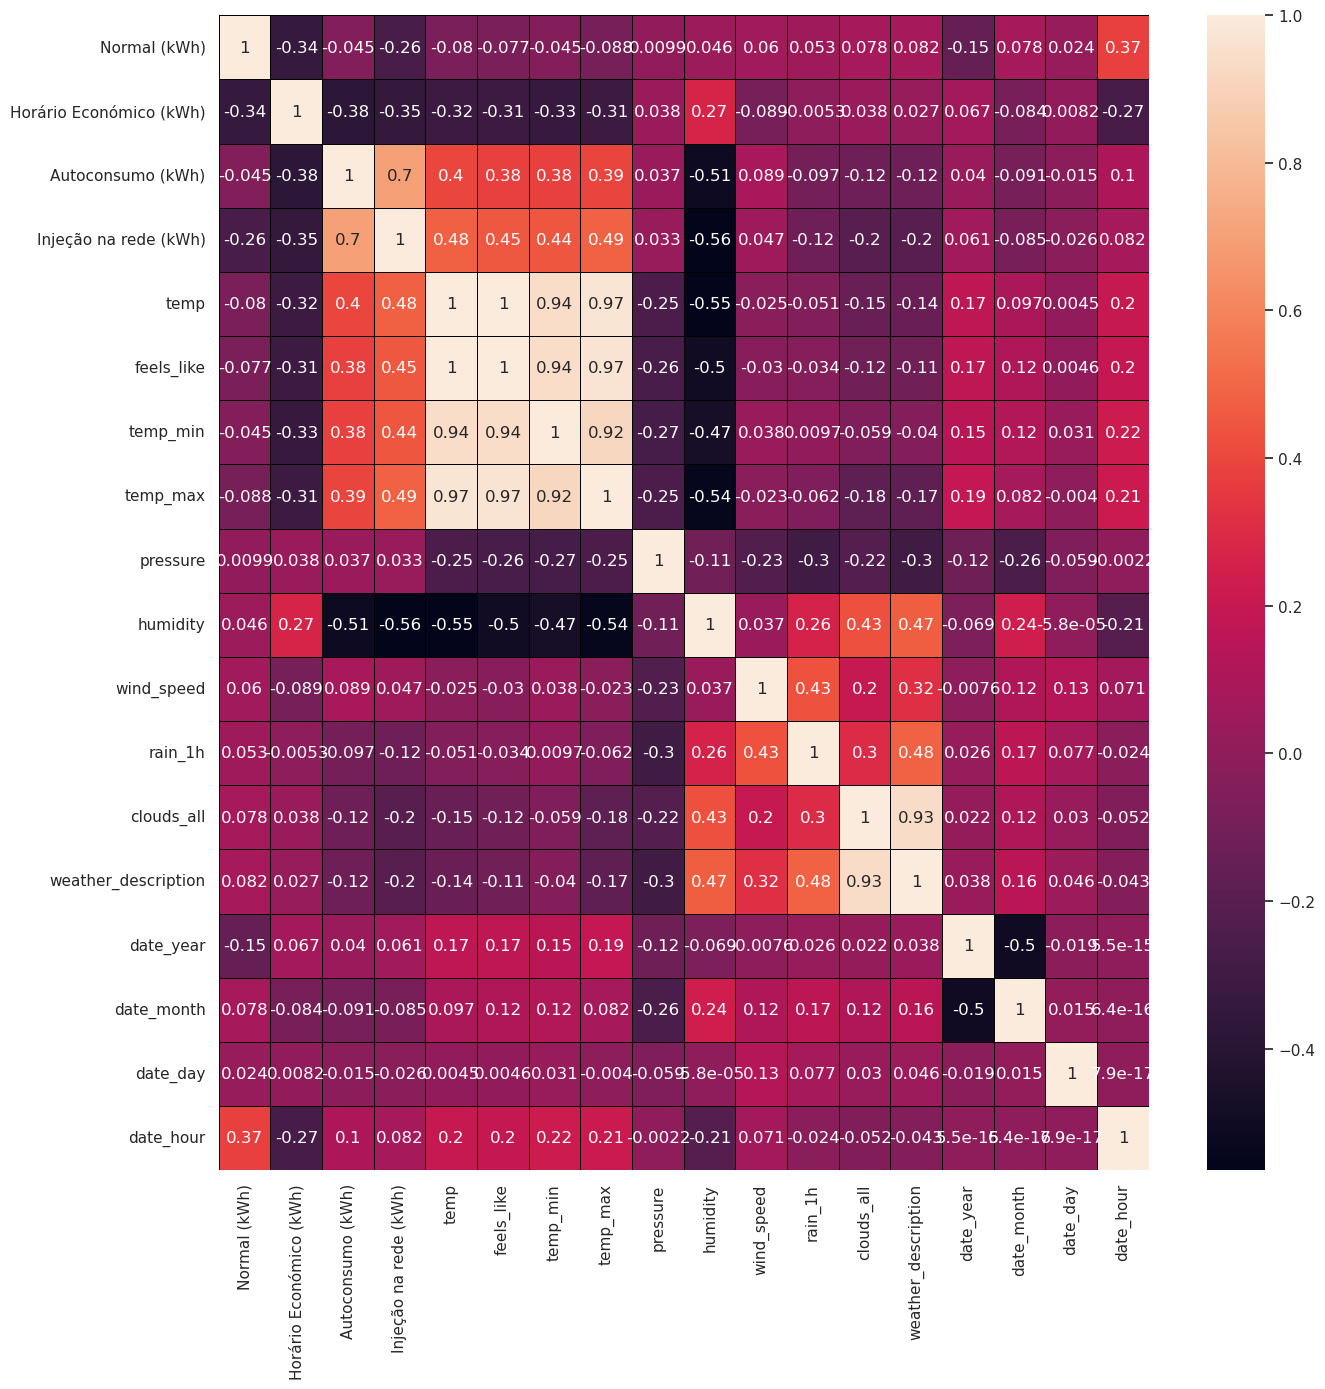

In [62]:
fig = plt.figure(figsize=(15,15))
inj_corr = df_train.corr(method='pearson')
sns.heatmap(inj_corr,linecolor='black',linewidth=0.5,annot=True)

In [63]:
df_train.drop(['feels_like'], axis=1, inplace=True)
df_train.drop(['temp_min'], axis=1, inplace=True)
df_train.drop(['temp_max'], axis=1, inplace=True)
df_train.drop(['date_day','date_year','weather_description'],axis=1,inplace=True)

In [64]:
df_train_vis=df_train.copy()

In [65]:
df_teste_v1.drop(['feels_like'], axis=1, inplace=True)
df_teste_v1.drop(['temp_min'], axis=1, inplace=True)
df_teste_v1.drop(['temp_max'], axis=1, inplace=True)
df_teste_v1.drop(['date_day','date_year','weather_description'],axis=1,inplace=True)

In [66]:
df_teste_v1 = df_teste_v1.rename(columns={'temp_x': 'temp'})

In [67]:
df_teste_v1 = df_teste_v1.rename(columns={'humidity_x': 'humidity'})

In [68]:
linhas_com_nulos = df_teste_v1[df_teste_v1.isnull().any(axis=1)]
linhas_com_nulos

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,pressure,humidity,wind_speed,rain_1h,clouds_all,date_month,date_hour
2017,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,3,1


In [69]:
linhas_selecionadas = df_teste_v1.iloc[2016:2019]
linhas_selecionadas

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,pressure,humidity,wind_speed,rain_1h,clouds_all,date_month,date_hour
2016,0.0,0.384,0.0,13.7,1022.1,99.06,2.222222,1.254,90.4,3,0
2017,0.0,0.000,0.0,NaN,NaN,NaN,NaN,0.000,NaN,3,1
2018,0.0,0.419,0.0,13.7,1022.1,92.72,3.111111,0.000,89.0,3,2


In [70]:
df_teste_v1 = df_teste_v1.ffill().add(df_teste_v1.bfill()).div(2)

In [71]:
linhas_selecionadas = df_teste_v1.iloc[2016:2019]
linhas_selecionadas

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,pressure,humidity,wind_speed,rain_1h,clouds_all,date_month,date_hour
2016,0.0,0.384,0.0,13.7,1022.1,99.06,2.222222,1.254,90.4,3.0,0.0
2017,0.0,0.000,0.0,13.7,1022.1,95.89,2.666667,0.000,89.7,3.0,1.0
2018,0.0,0.419,0.0,13.7,1022.1,92.72,3.111111,0.000,89.0,3.0,2.0


In [72]:
#pair_plot=sns.pairplot(df_train)
#pair_plot.savefig('competicaopairplot.png')

In [73]:
df_vis=df_train.copy()

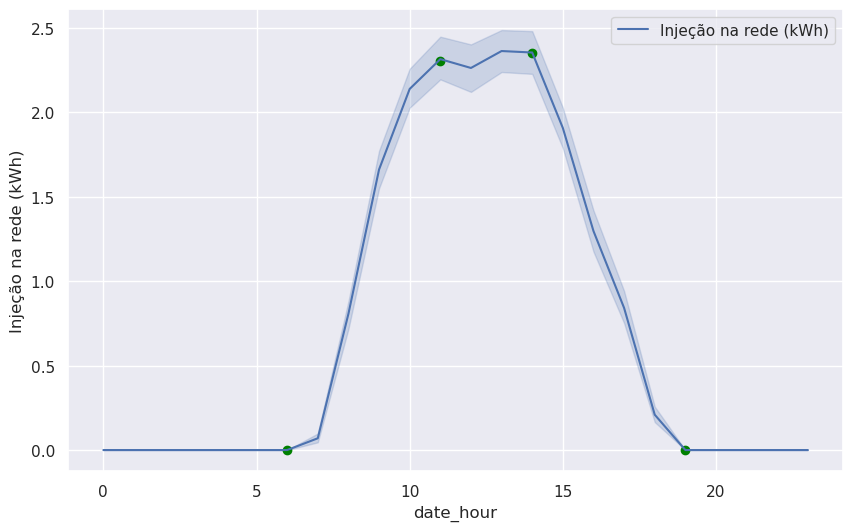

In [74]:
# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_vis['date_hour'], y="Injeção na rede (kWh)", data=df_vis, label='Injeção na rede (kWh)')
plt.scatter(6, 0, color='green', label='Ponto Específico')
plt.scatter(11, 2.3, color='green', label='Ponto Específico')
plt.scatter(14, 2.35, color='green', label='Ponto Específico')
plt.scatter(19, 0, color='green', label='Ponto Específico')

In [75]:
def fase_do_dia(hour):

    if hour<=6 and hour>=19:
        return 1

    elif hour<=11 and hour>=6:
        return 2

    elif hour<=14 and hour>=11:
        return 3
    else:
        return 4

In [76]:
df_train['day_fase']=df_train['date_hour'].apply(fase_do_dia)

In [77]:
df_teste_v1['day_fase']=df_teste_v1['date_hour'].apply(fase_do_dia)

### Outliers

In [78]:
df_train_out = df_train.copy()

Temp

<Axes: xlabel='temp'>

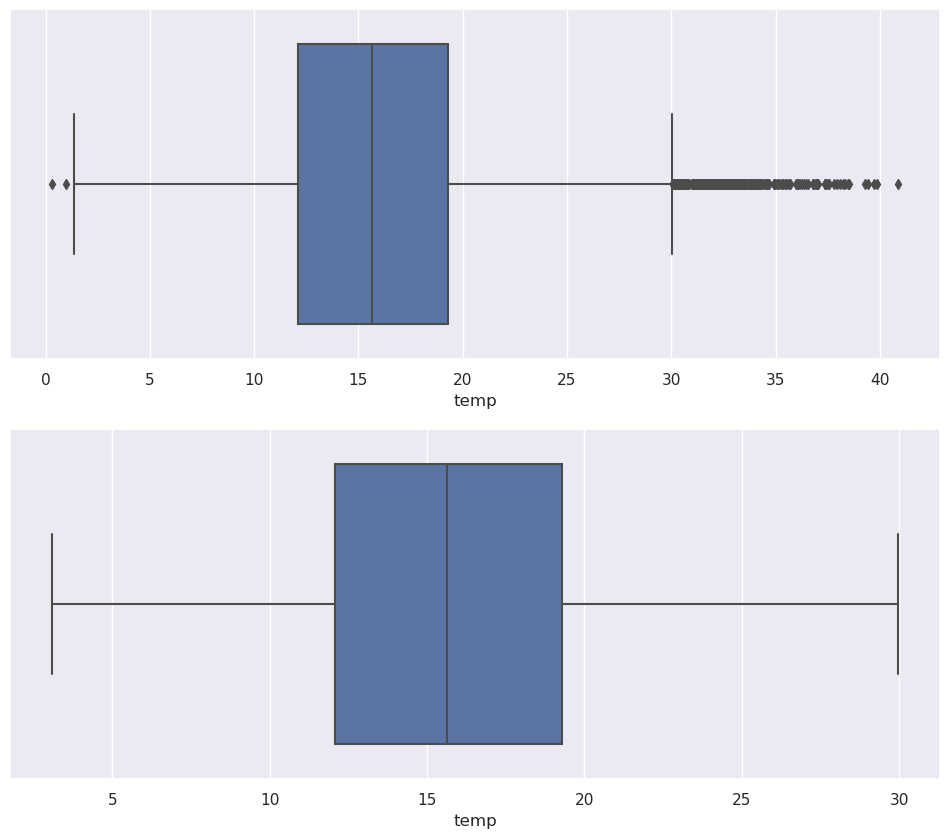

In [79]:
#sns.boxplot(x=df_train['temp'])

lower = df_train['temp'].quantile(0.001)
upper = df_train['temp'].quantile(0.975)


df_train_out['temp'] = np.where(df_train_out['temp']>upper, upper,df_train_out['temp'])
df_train_out['temp'] = np.where(df_train_out['temp']<lower, lower,df_train_out['temp'])

fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.boxplot(x=df_train['temp'],ax=axs[0])
sns.boxplot(x=df_train_out['temp'],ax=axs[1])

Pressure

<Axes: xlabel='pressure'>

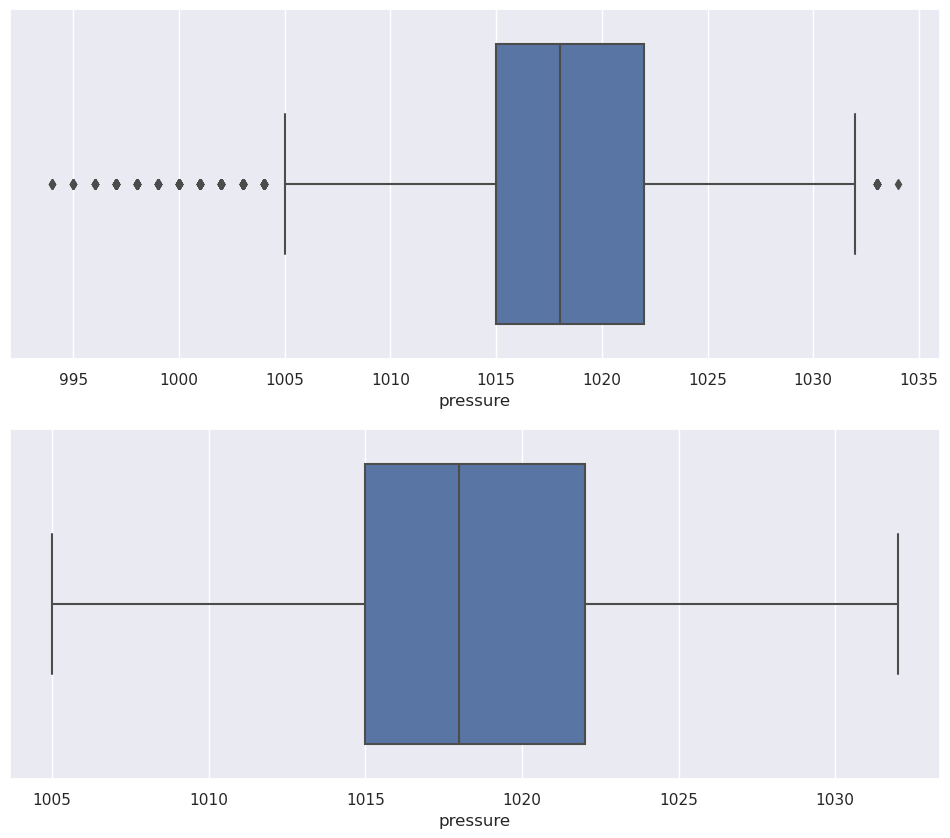

In [80]:
lower = df_train_out['pressure'].quantile(0.028)
upper = df_train_out['pressure'].quantile(0.995)


df_train_out['pressure'] = np.where(df_train_out['pressure']>upper, upper,df_train_out['pressure'])
df_train_out['pressure'] = np.where(df_train_out['pressure']<lower, lower,df_train_out['pressure'])

fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.boxplot(x=df_train['pressure'],ax=axs[0])
sns.boxplot(x=df_train_out['pressure'],ax=axs[1])

Humidity

<Axes: xlabel='humidity'>

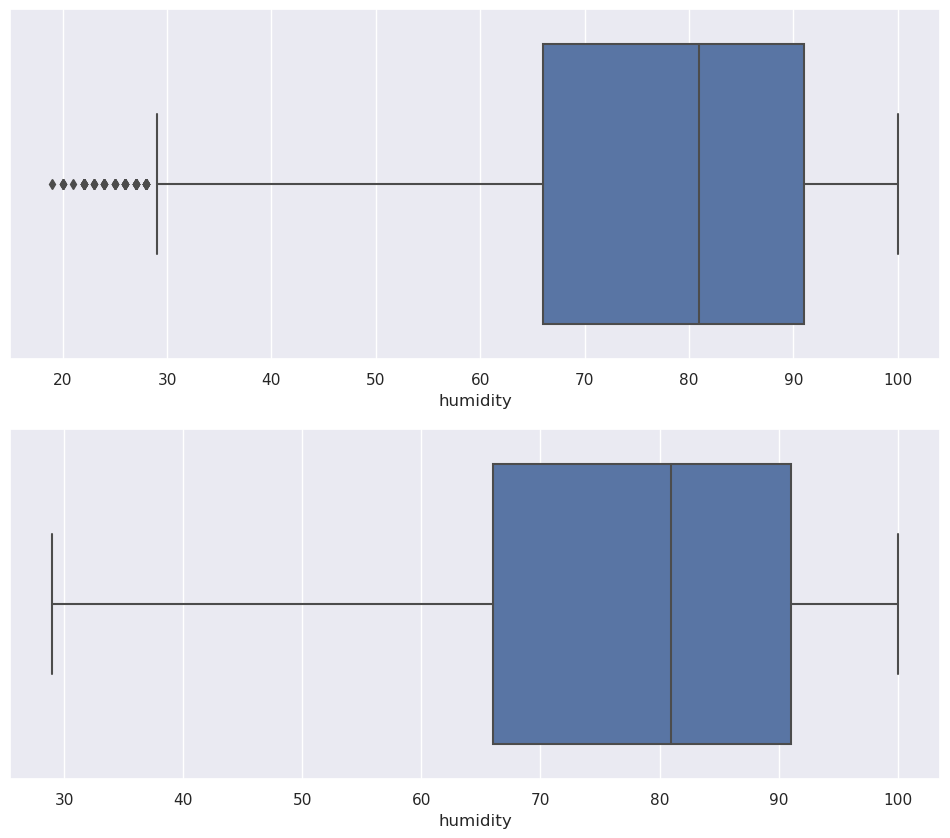

In [81]:
lower = df_train_out['humidity'].quantile(0.007)

df_train_out['humidity'] = np.where(df_train_out['humidity']<lower, lower,df_train_out['humidity'])

fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.boxplot(x=df_train['humidity'],ax=axs[0])
sns.boxplot(x=df_train_out['humidity'],ax=axs[1])

wind_speed

<Axes: xlabel='wind_speed'>

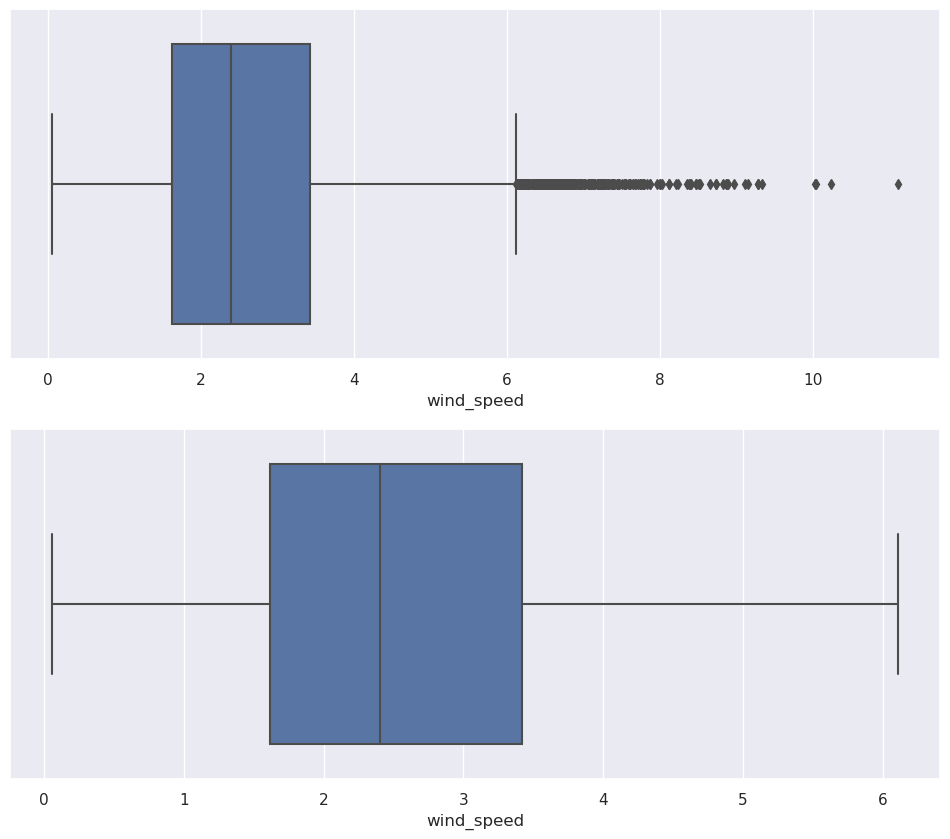

In [82]:
upper = df_train_out['wind_speed'].quantile(0.968)

df_train_out['wind_speed'] = np.where(df_train_out['wind_speed']>upper, upper,df_train_out['wind_speed'])
fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.boxplot(x=df_train['wind_speed'],ax=axs[0])
sns.boxplot(x=df_train_out['wind_speed'],ax=axs[1])

clouds_all

<Axes: xlabel='clouds_all'>

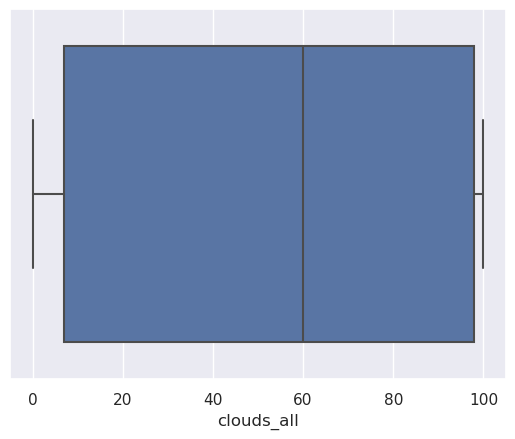

In [83]:
sns.boxplot(x=df_train_out['clouds_all'])

## Testes

In [84]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,KFold, train_test_split
from sklearn.metrics import make_scorer,classification_report,ConfusionMatrixDisplay,accuracy_score

In [85]:
from sklearn.model_selection import train_test_split,cross_val_score

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
from sklearn.svm import SVC

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier
from sklearn.preprocessing import MinMaxScaler

2024-01-09 11:43:29.095571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [89]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

### Partição de dados

In [90]:
X = df_train.drop(['Injeção na rede (kWh)'], axis=1)
y = df_train['Injeção na rede (kWh)']

In [91]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.2, random_state=2023)

-------------------------------------------------------
-------------------------------------------------------

In [92]:
param_grid_dt={'criterion':['gini','entropy','log_loss'],'max_depth':[5,6,7,8],'min_samples_split': [2,3,4],'min_samples_leaf': [1,2,3, 4]}
estimator_dt=DecisionTreeClassifier(random_state=2021)
grid_dt=GridSearchCV(estimator_dt,param_grid_dt,refit=True,verbose=0)

In [93]:
grid_dt.fit(X_train_p,y_train_p)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [94]:
best_params = grid_dt.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [95]:
dt_model = grid_dt.best_estimator_

In [96]:
dt_model

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=2021)

In [97]:
previsao_dt = dt_model.predict(X_test_p)

In [98]:
accuracy_score(y_test_p,previsao_dt)

0.8666061705989111

In [99]:
print(classification_report(y_test_p,previsao_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1568
         1.0       0.40      0.19      0.26        91
         2.0       0.61      0.66      0.63       214
         3.0       0.63      0.67      0.65       215
         4.0       0.68      0.59      0.63       116

    accuracy                           0.87      2204
   macro avg       0.66      0.62      0.63      2204
weighted avg       0.86      0.87      0.86      2204



---------------------------------------------------------------------------------
---------------------------------------------------------------------------------

In [100]:
param_grid_dt2={'n_estimators':[150,200,250],'max_depth':[7,8,9],'min_samples_split': [2,3,4],'min_samples_leaf': [1,2,3]}
estimator_dt2=RandomForestClassifier(bootstrap=False ,random_state=2022)
grid_dt2=GridSearchCV(estimator_dt2,param_grid_dt2,refit=True,verbose=0)

In [101]:
#rf_classifier = RandomForestClassifier(n_estimators=150,bootstrap=False ,random_state=42)

In [102]:
grid_dt2.fit(X_train_p,y_train_p)

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                              random_state=2022),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 200, 250]})

In [103]:
best_params = grid_dt2.best_params_
best_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [104]:
rf_model = grid_dt2.best_estimator_

In [105]:
previsao_rf = rf_model.predict(X_test_p)

In [106]:
accuracy_score(y_test_p,previsao_rf)

0.8861161524500908

In [107]:
print(classification_report(y_test_p,previsao_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1568
         1.0       0.59      0.11      0.19        91
         2.0       0.65      0.71      0.68       214
         3.0       0.67      0.77      0.72       215
         4.0       0.79      0.68      0.73       116

    accuracy                           0.89      2204
   macro avg       0.73      0.65      0.66      2204
weighted avg       0.88      0.89      0.88      2204



---------------------------------------------------------------
---------------------------------------------------------------

In [110]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear']}

In [111]:
grid_svc = GridSearchCV(SVC(random_state=2023),param_grid,refit=True,verbose=0)

In [112]:
grid_svc.fit(X_train_p,y_train_p)

GridSearchCV(estimator=SVC(random_state=2023),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [113]:
grid_svc.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [114]:
svm_model = grid_svc.best_estimator_

In [115]:
previsao_svm = svm_model.predict(X_test_p)

In [116]:
print(classification_report(y_test_p,previsao_svm))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1568
         1.0       0.25      0.14      0.18        91
         2.0       0.57      0.59      0.58       214
         3.0       0.64      0.64      0.64       215
         4.0       0.72      0.72      0.72       116

    accuracy                           0.86      2204
   macro avg       0.63      0.61      0.62      2204
weighted avg       0.85      0.86      0.85      2204



In [117]:
accuracy_score(y_test_p,previsao_svm)

0.8566243194192378

-----------------------------
-----------------------------

In [118]:
param_xgb={'n_estimators':[200,225,250],'learning_rate':[0.05,0.1,0.2],'max_depth':[3,4,5]}
estimator_xgb=XGBClassifier()
grid_xgb=GridSearchCV(estimator_xgb,param_xgb,scoring='accuracy',refit=True,verbose=0)

In [119]:
grid_xgb.fit(X_train_p,y_train_p)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [200, 225, 250]},
             scoring='accuracy')

In [120]:
grid_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 225}

In [121]:
xgb_score = grid_xgb.score(X_test_p,y_test_p)

In [122]:
print("Accuracy: %.2f%%" % (xgb_score * 100))

Accuracy: 89.11%


In [123]:
xgb_model = grid_xgb.best_estimator_
xgb_predictions = xgb_model.predict(X_test_p)

In [124]:
print(classification_report(y_test_p,xgb_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1568
         1.0       0.40      0.19      0.26        91
         2.0       0.66      0.64      0.65       214
         3.0       0.72      0.77      0.74       215
         4.0       0.77      0.86      0.81       116

    accuracy                           0.89      2204
   macro avg       0.70      0.69      0.69      2204
weighted avg       0.88      0.89      0.88      2204



-------------------------
-------------------------

Stacking

In [125]:
estimators = [("dt", dt_model), ("svm", svm_model), ("rf", rf_model),("xgb",xgb_model)]

In [126]:
st_model = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(max_iter=1000))

In [127]:
st_model.fit(X_train_p,y_train_p)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_leaf=2,
                                                       random_state=2021)),
                               ('svm',
                                SVC(C=1000, gamma=0.001, random_state=2023)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=9,
                                                       min_samples_split=3,
                                                       n_estimators=150,
                                                       random_state=2022)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=225, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [128]:
st_score = st_model.score(X_test_p,y_test_p)

In [129]:
print("Accuracy: %.2f%%" % (st_score * 100))

Accuracy: 88.97%


In [130]:
st_predictions = st_model.predict(X_test_p)

------------------------------------------------
Test

------------------------------------------------

In [156]:
X_train = df_train.drop(['Injeção na rede (kWh)'],axis=1)

In [157]:
y_train = df_train['Injeção na rede (kWh)'].to_frame()

In [158]:
X_teste = df_teste_v1.copy()

### Decision Tree

In [ ]:
dt_model.fit(X_train, y_train)

In [ ]:
dt_predictions = dt_model.predict(X_teste)

### Random Forest

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
rf_predictions = rf_model.predict(X_teste)

### SVM

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(X_teste)

### XGBoost

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_predictions = xgb_model.predict(X_teste)

### Stacking

In [159]:
st_model.fit(X_train, y_train)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_leaf=2,
                                                       random_state=2021)),
                               ('svm',
                                SVC(C=1000, gamma=0.001, random_state=2023)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=9,
                                                       n_estimators=150,
                                                       random_state=2022)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsamp...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=225, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [160]:
st_predictions = st_model.predict(X_teste)

# Escrever ficheiro

In [161]:
predictions_tofile=pd.DataFrame(st_predictions)

In [162]:
predictions_tofile.index = predictions_tofile.index + 1
predictions_tofile['RowId'] = predictions_tofile.index

In [163]:
predictions_tofile.columns = ['Result','RowId']

In [164]:
replace_map_final = {0:'None', 1: 'Low', 2: 'Medium',3: 'High',4: 'Very High'}

In [165]:
predictions_tofile['Result'] = predictions_tofile['Result'].map(replace_map_final)

In [166]:
predictions_tofile.to_csv('./results/res21.csv', index=False, sep=',', columns=['RowId','Result'])